In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
fs = 100
t = np.linspace(0, 10, fs * 10)

In [3]:
ppg_signal = 0.6 * np.sin(2 * np.pi * 1.2 * t) + np.random.normal(0, 0.05, len(t))

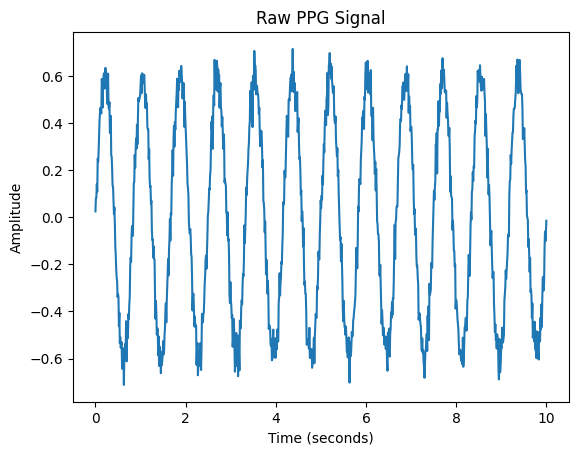

In [4]:
plt.plot(t,ppg_signal)
plt.title("Raw PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

Text(0, 0.5, 'Amplitude')

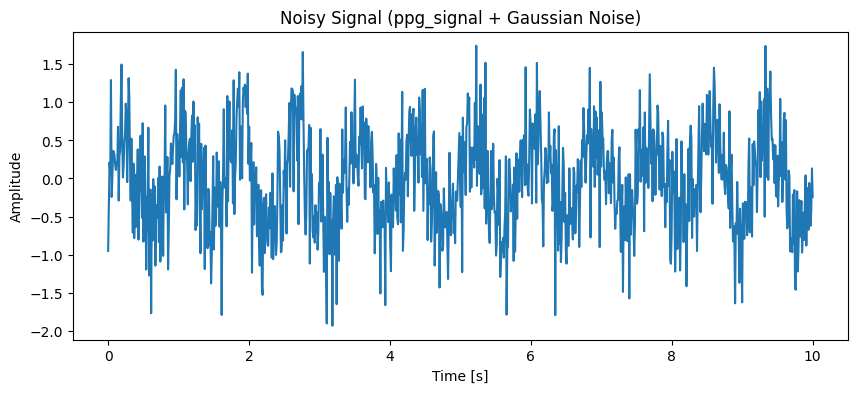

In [7]:
mean = 0
std = 0.5  # Standard deviation of the noise
noise = np.random.normal(mean, std, ppg_signal.shape)

# Add noise to the signal
noisy_signal = ppg_signal + noise

# Plot the noisy signal
plt.figure(figsize=(10, 4))

plt.plot(t, noisy_signal)
plt.title("Noisy Signal (ppg_signal + Gaussian Noise)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")


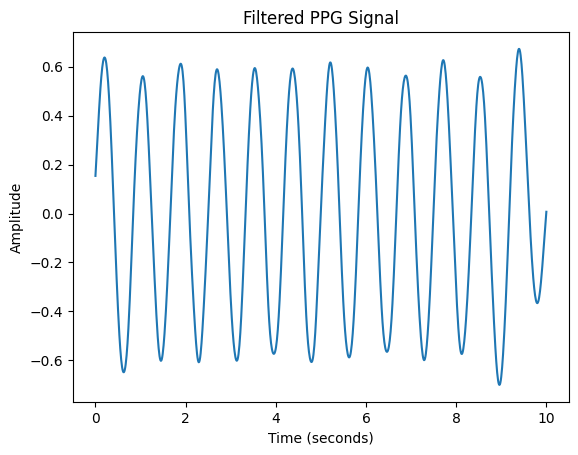

In [8]:
from scipy.signal import butter, filtfilt

# Bandpass filter design (0.5 to 5 Hz for heart rate detection)
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Filtered PPG signal
filtered_ppg = bandpass_filter(ppg_signal, 0.5, 5, fs)
plt.plot(t, filtered_ppg)
plt.title("Filtered PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

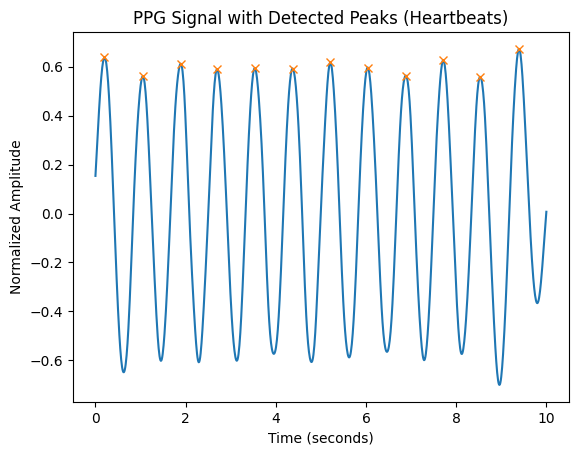

Heart Rate:  71.9246518807279  BPM


In [18]:
from scipy.signal import find_peaks

# Detect peaks in the PPG signal
peaks, _ = find_peaks(filtered_ppg, distance=fs*0.6)

# Calculate Heart Rate (BPM)
ibi = np.diff(peaks) / fs  
heart_rate = 60 / ibi  

# Plot the PPG signal with detected peaks
plt.plot(t, filtered_ppg)
plt.plot(t[peaks], filtered_ppg[peaks], "x")
plt.title("PPG Signal with Detected Peaks (Heartbeats)")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.show()

print("Heart Rate: ", np.mean(heart_rate), " BPM")


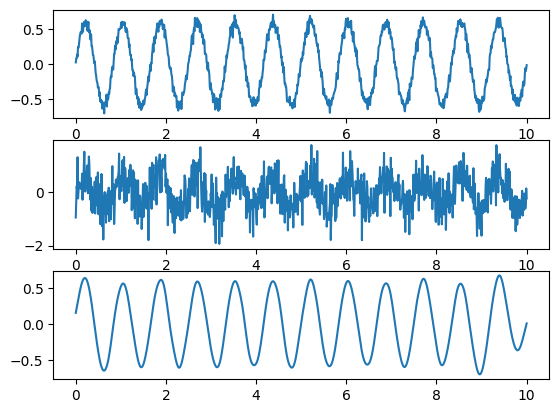

In [20]:
plt.subplot(3,1,1)
plt.plot(t,ppg_signal)
plt.subplot(3,1,2)
plt.plot(t, noisy_signal)
plt.subplot(3,1,3)
plt.plot(t, filtered_ppg)